## Отчет анализа стоимости ювелирных изделий у КДМ 1С8

### 1. Выгружены продажи 1С8 за период  
 
  Проанализирована партия ювелирных изделий, проданных сетью "Бриллиантовая Якутия" за период март 2021 по сентябрь 2021. Продажи через 1С8, благадоря внедрению описания вставок появилась возможность анализировать прейскурантную стоимость изделий. Для чистоты оставлены изделия только с бриллиантами, т.е выведены изделия с бриллиантами и другими ДК и ПДК Исключены изделия проданные выше 500т.руб. и с бриллиантами с прейскурантной стоимостью свыше 3000$

В итоге получен датасет с 896 данными общая масса изделий 2580 грамма на сумму 37.9 млн рублей с прейскурантной стоимостью 172 тыс долл

Выручка 37868631.46 рублей

Масса изделий 2580.37 грамм

Прейскурант бриллиантов в долларах 172272.65

Закупочные 18970137.47 рублей

Розница 57749060.00 рублей утвержденная цена до скидки
 
 
Датасет приведен в файле Продажи1с8по11-10-2021manual_only_vstv_only_diamonds.xlsx

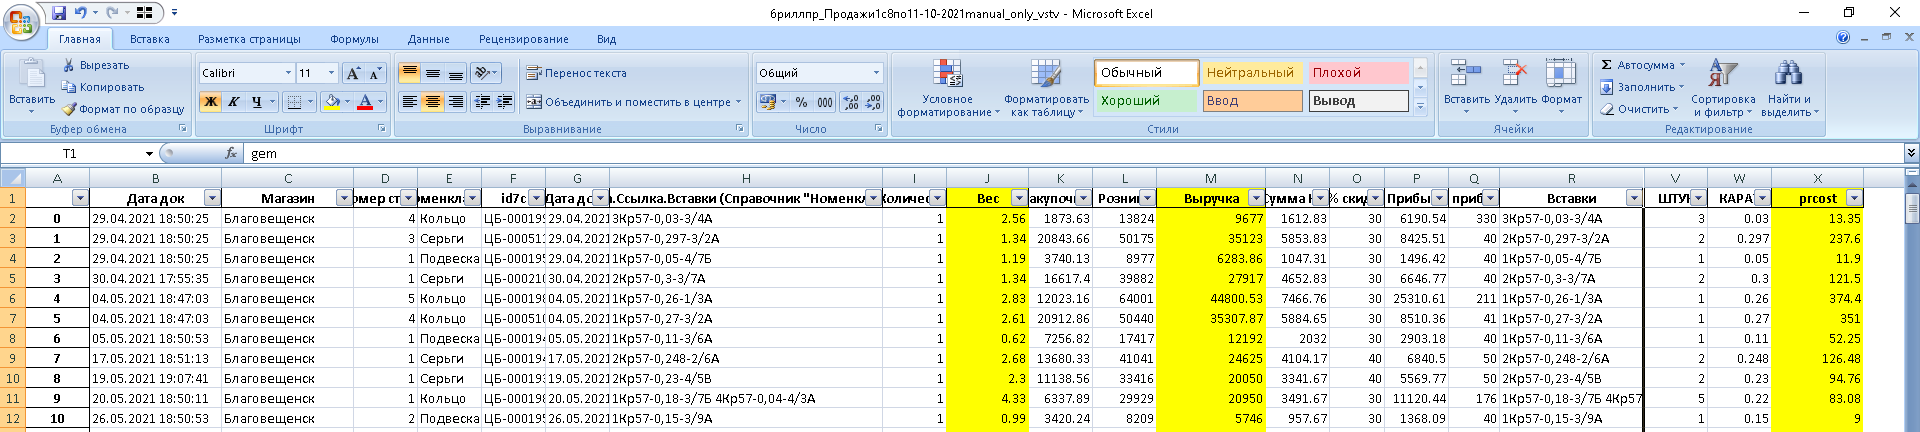

### 2. Анализ датасета, визуализация, определение коэфициентов
#### 2.1 Считывание данных с файла
Для этого устанавливаем необходимые модули.
 - загружаем данные с файла 
 - откыдываем изделия дороже 500т руб, 
 - оставляем изделия пробы 585,
 - отбрасываем изделия с бриллиантами по прейскуранту свыше 3000 долларов
 - оставлены поля price : цена изделя, weight: масса изделия в граммах, prcost: прейскурант в долларах

In [8]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
filename = 'jewels/kdm_1c8/Продажи1с8по11-10-2021manual_only_vstv_only_diamonds.xlsx'
raw = pd.read_excel(filename,sheet_name=0)

In [3]:
data = raw.loc[:,['Выручка','Вес','prcost','Закупочные','Розница']].loc[(raw.Выручка<500000),:].loc[(raw.prcost<3000),:]
data.rename(columns={'Выручка':'price','Вес':'weight'}, inplace=True)
data.head()
#(raw.gold.str.contains('585') #'price','weight','prcost'

,price,weight,prcost,Закупочные,Розница
0,9677.00,2.56,13.35,1873.63,13824.0
1,35123.00,1.34,237.60,20843.66,50175.0
2,6283.86,1.19,11.90,3740.13,8977.0
3,27917.00,1.34,121.50,16617.40,39882.0
4,44800.53,2.83,374.40,12023.16,64001.0


Получен датасет с 896 данными общая масса изделий 2580 грамма на сумму 37.9 млн рублей с прейскурантной стоимостью 172 тыс долл 

In [4]:
#сумма датасета
data.describe()

,price,weight,prcost,Закупочные,Розница
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,42264.097612,2.879877,192.268583,21172.028426,64452.075893
std,46280.813072,1.965014,277.006626,24389.067562,70389.828591
min,862.000000,0.180000,1.170000,512.620000,1231.000000
25%,15667.102500,1.680000,46.720000,6891.880000,24084.250000
50%,27712.500000,2.465000,112.850000,14037.255000,42061.000000
75%,50260.287500,3.370000,216.300000,26680.087500,76968.500000
max,483476.000000,19.910000,2979.240000,287783.210000,690680.000000


In [5]:
data.sum()

price         37868631.46
weight            2580.37
prcost          172272.65
Закупочные    18970137.47
Розница       57749060.00
dtype: float64

#### 2.2 Визуализиация данных
Построим облако точек в трехмерной плоскости
- х вес золота в граммах
- y стоимость прейскурантная бриллиантов
- z стоимость изделия в тысячах рублей

Если покрутить график, то видно что точки стремятся к плоскости



<IPython.core.display.Javascript object>


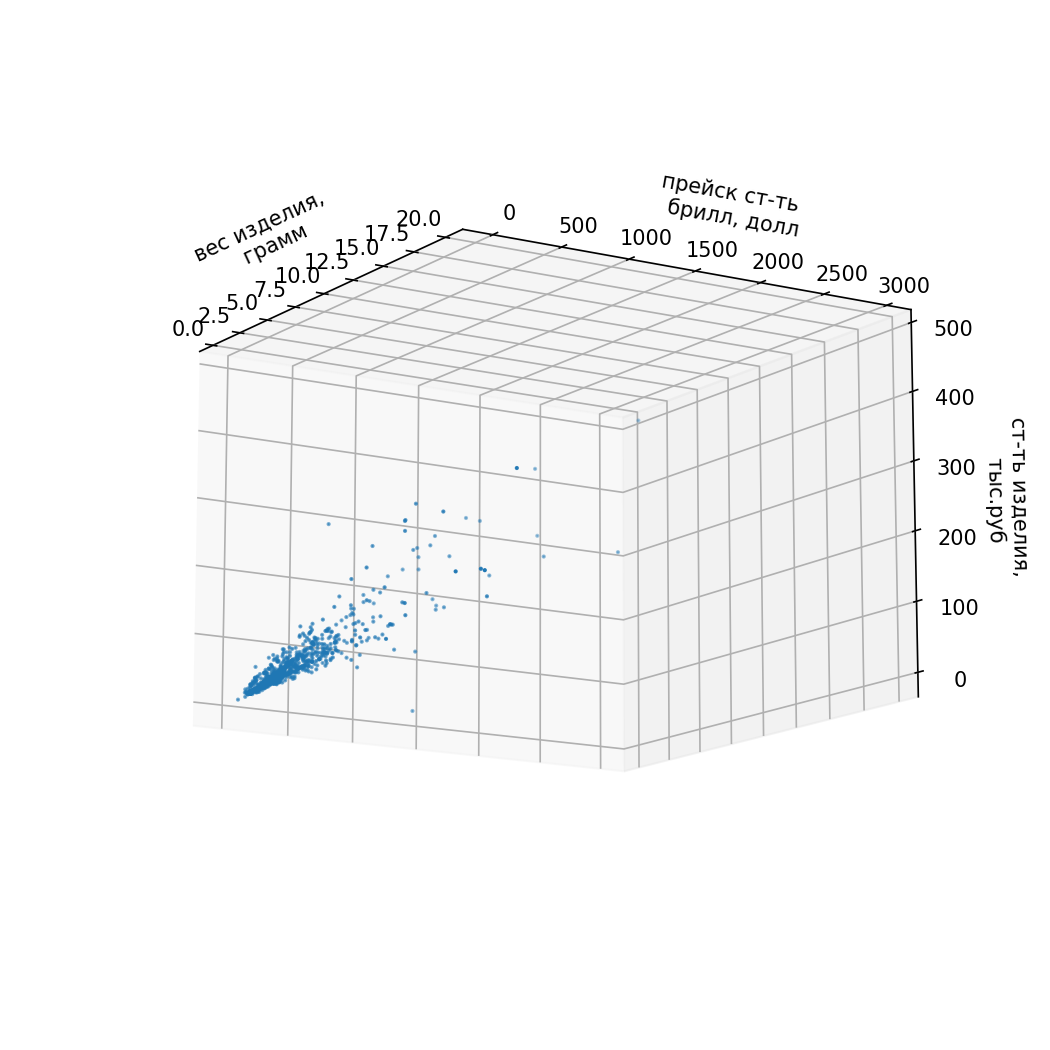

In [9]:
#
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection = "3d")
ax.scatter3D(data.weight,data.prcost,data.price/1000,s=1,c='#1f77b4')
ax.set_xlabel('вес изделия, \n грамм')
ax.set_ylabel('прейск ст-ть \n брилл, долл')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(45,0)
#todo 3 projection need

#### 2.3 Подготовка данных для определения коэффициентов  

Для того чтобы полученные коэффициенты имели интерпретируемый смысл, предлагается прейскурантную стоимость бриллиантов перевести в рубли, граммы золота перевести в биржевую стоимость золота, данного веса изделия в рублях. 

In [10]:
#Курс доллара и биржевая цена золота на 03-12-2021
dollar_rate = 73.66
gold_rate = 4191.05
data['prcost_rub'] = data.prcost*dollar_rate
data['gold_rub'] = data.weight*0.585*gold_rate
pd.options.display.float_format ="{:.2f}".format
data.head()

,price,weight,prcost,Закупочные,Розница,prcost_rub,gold_rub
0,9677.00,2.56,13.35,1873.63,13824.00,983.36,6276.52
1,35123.00,1.34,237.60,20843.66,50175.00,17501.62,3285.36
2,6283.86,1.19,11.90,3740.13,8977.00,876.55,2917.60
3,27917.00,1.34,121.50,16617.40,39882.00,8949.69,3285.36
4,44800.53,2.83,374.40,12023.16,64001.00,27578.30,6938.49


<IPython.core.display.Javascript object>


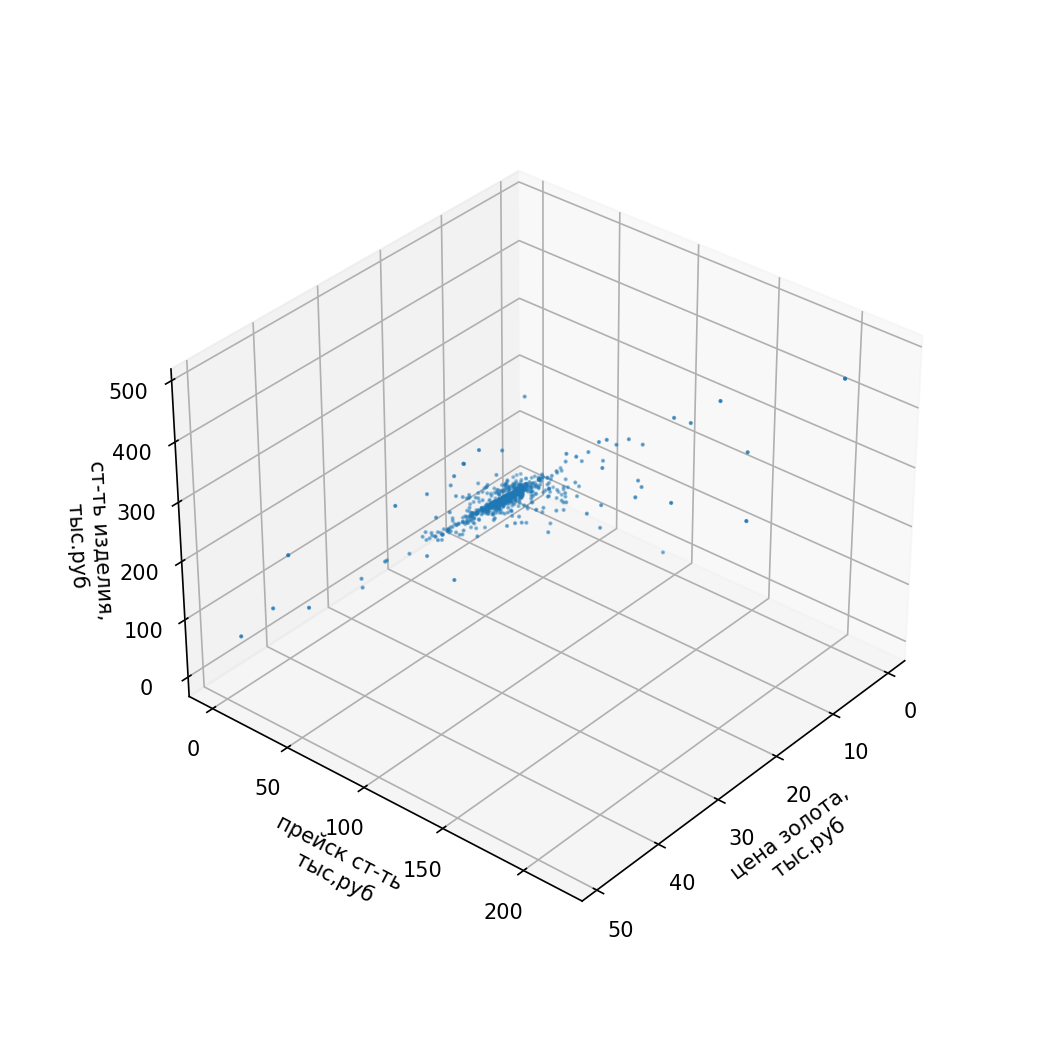

In [11]:
#новое графическое представление будеть иметь вид
fig2 = plt.figure(figsize=(7,7))
ax = plt.gca(projection = "3d")
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='#1f77b4')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(45,0)

Цена ювелирного изделия в первом приближении формируется линейной зависимостью, если обозначить за Z - цену издели, X - масса золота, Y - прейскурнтная стоимость бриллианов то можно записть закономерностю вида:

$$ Z = f(X,Y) = НДС*СКИДКА*НАЦЕНКА*\\(ПРОБА*БИРЖЕВАЯСТОИМОСТ*НАЦЕНКАЗОЛОТА*СЛОЖНОСТЬ*X\\ 
+НАЦЕНКАПРЕЙСКУРАНТ*СЛОЖНОСТЬ*Y+НАЦЕНКАБЕЗДКДМ) $$
можно раскрыть скобки, перемножить множители и мы получим уравнение вида:
$$ Z = A*X+B*Y+C $$
линейное уравнение такого вида в трехмерной плоскости является плоскостью, поэтому необходимо усредненную плоскость и найти эти три коэффициента.

#### 2.4 Вычисление коэффициентов усредненой по облаку данных плоскости  

Для этого мы устанавливаем модуль отвечающий за расчеты линейной алгебры, и загружаем наши данные для расчета коэффициентов, и получаем коэффициенты



In [12]:
from sklearn import linear_model
#подготовка данных 
miuz = linear_model.LinearRegression()
X_train = data.iloc[:,:].loc[:,['gold_rub','prcost_rub']].to_numpy()
Y_train = data.iloc[:,:].loc[:,'price'].to_numpy()
miuz.fit(X_train,Y_train)
A,B = miuz.coef_
C =  miuz.intercept_
A,B,C

(2.044914134679972, 1.9147641502503112, 707.5541599053176)

#### 2.5 Визуальная проверка полученных коэффициентов

In [13]:
#проверка
data['predict'] = miuz.predict(X_train)
data['bycoef'] = data.gold_rub*miuz.coef_[0] + data.prcost_rub*miuz.coef_[1]+miuz.intercept_
data['diff'] = data.predict-data.bycoef
data.head()

,price,weight,prcost,Закупочные,Розница,prcost_rub,gold_rub,predict,bycoef,diff
0,9677.00,2.56,13.35,1873.63,13824.00,983.36,6276.52,15425.40,15425.40,0.00
1,35123.00,1.34,237.60,20843.66,50175.00,17501.62,3285.36,40937.31,40937.31,0.00
2,6283.86,1.19,11.90,3740.13,8977.00,876.55,2917.60,8352.19,8352.19,0.00
3,27917.00,1.34,121.50,16617.40,39882.00,8949.69,3285.36,24562.39,24562.39,0.00
4,44800.53,2.83,374.40,12023.16,64001.00,27578.30,6938.49,67702.12,67702.12,0.00


Усредненная по нашим данным плоскость и коэффициенты посчитаны модулем по методу наименьних квадратов, постороим на плоскость построенной плоскости для проверки

<IPython.core.display.Javascript object>


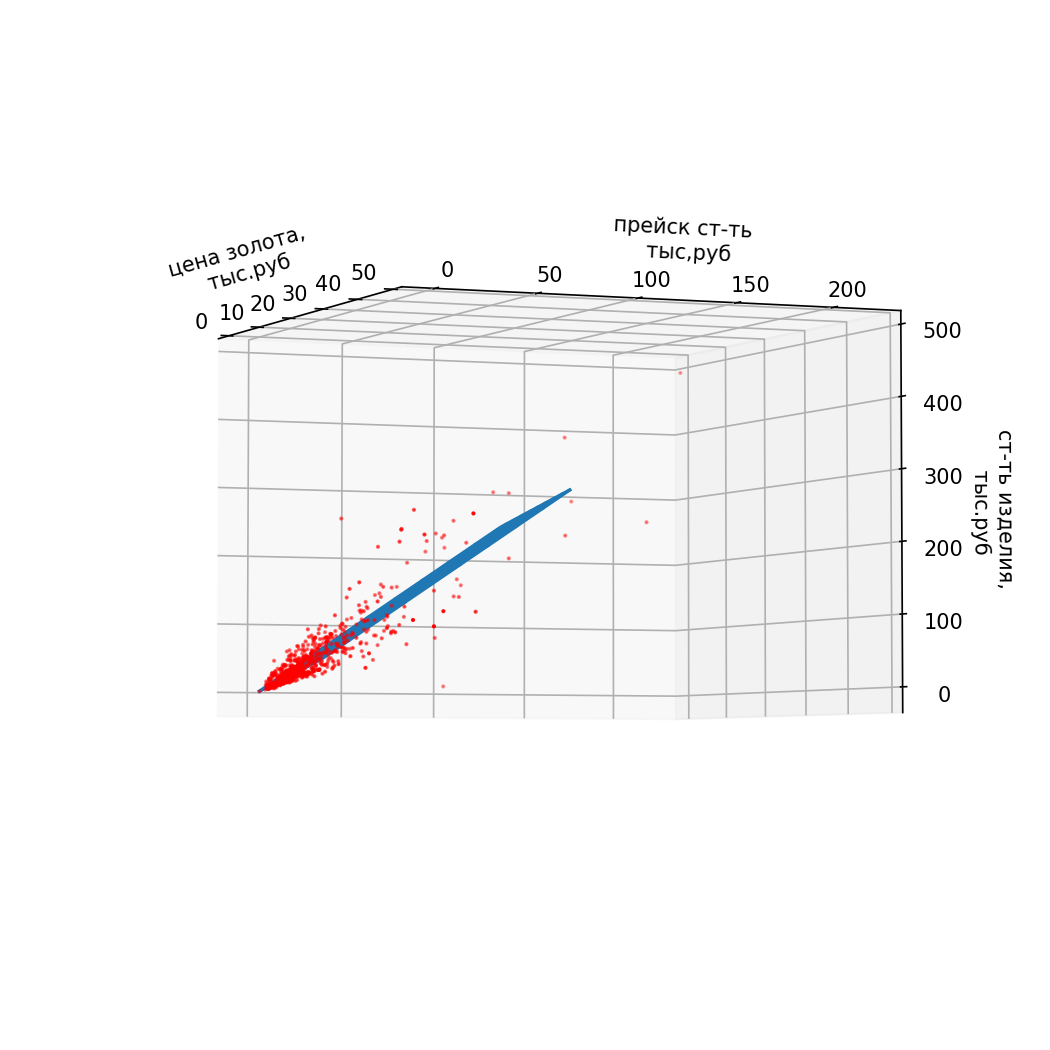

Text(0.5, 0, 'ст-ть изделия,\n тыс.руб')

In [14]:
x_val = np.linspace(0,20000,10)# np.arange(0, 20000,5000)
y_val = np.linspace(0,130000,10)
xx,yy = np.meshgrid(x_val,y_val)
zz = A*xx + B*yy + C/1000
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
#ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.predict/1000,s=1,c='red')
#ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.bycoef/1000,s=1,c='green')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
#ax.plot_surface(xx/1000, yy/1000, zz/1000)

<IPython.core.display.Javascript object>


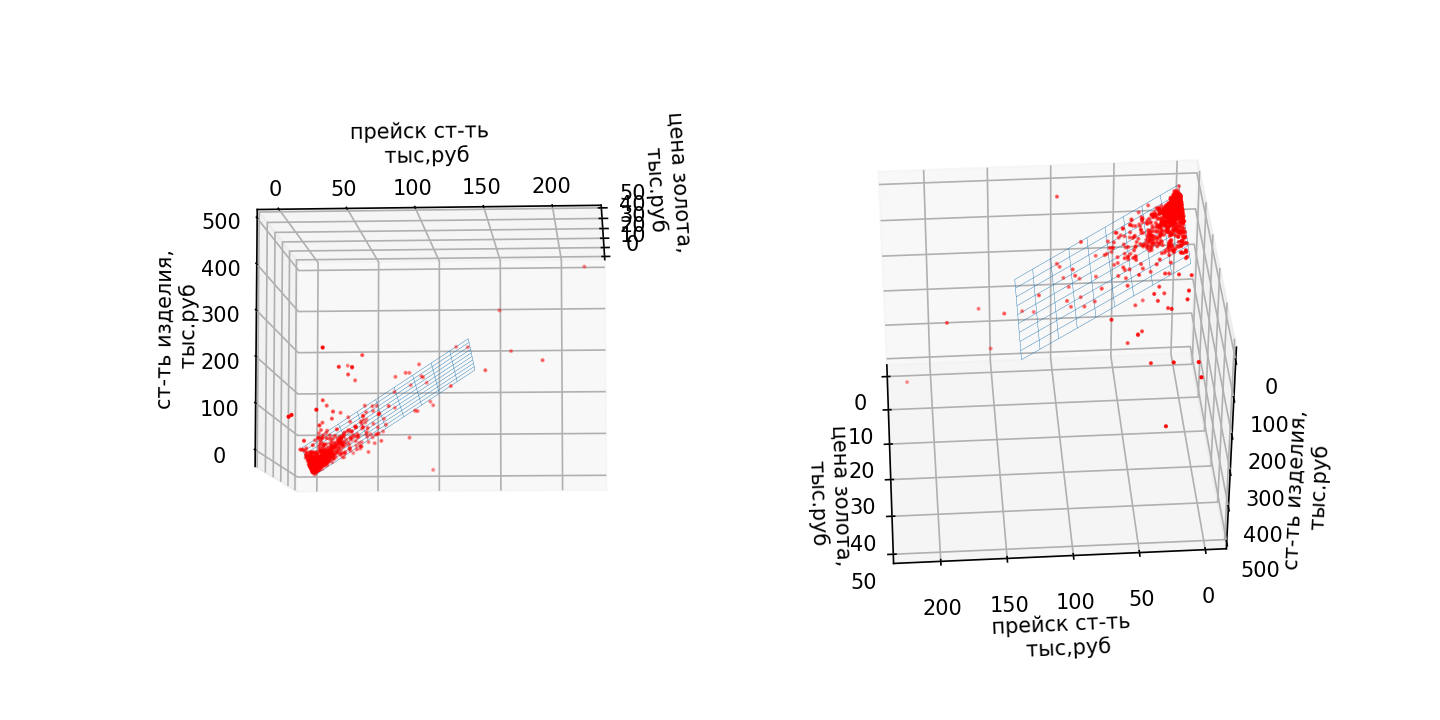

In [15]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-7,4)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-66,-166)


### 3. Вывод

Проанализирована партия ювелирных изделий, проданных сетью "Бриллиантовая Якутия" за период март 2021 по сентябрь 2021. Продажи через 1С8, благадоря внедрению описания вставок появилась возможность анализировать прейскурантную стоимость изделий. 
Для чистоты оставлены изделия только с бриллиантами, т.е выведены изделия с бриллиантами и другими ДК и ПДК
Исключены изделия проданные выше 500т.руб. и с бриллиантами с прейскурантной стоимостью свыше 3000$

В итоге получен датасет с 896 данными общая масса изделий 2580 грамма на сумму 37.9 млн рублей с прейскурантной стоимостью 172 тыс долл 

Выручка        37868631.46 рублей

Масса изделий           2580.37 грамм

Прейскурант бриллиантов в долларах         172272.65

Закупочные   18970137.47 рублей

Розница      57749060.00 рублей утвержденная цена до скидки

Облако данных приблизительно стремится к плоскости с такими коэффициентами: 
 коэффициенты цены изделия (2.044914134679972, 1.9147641502503112, 707.5541599053176) 

#### Это коэфициенты по реально проданным изделиям со средней скидкой от розничной стоимости 34,4%

$$А = 2.04$$

$$В = 1.91$$

$$С = 707.55$$

$$ Z = A*X+B*Y+C $$

где
- Z - стоимость по которой изделие было продано в рублях с учетом ндс и скидки
- X - биржевая стоимость золота, данного веса изделия в рублях
- Y - прейскурантная стоимость бриллиантов в рублях
- С - наценка в рублях не зависящая от граммов изделия и вставок

Для сравнения, по отчету анализа стоимости ювелирных изделий у МЮЗ спарсенных 16.11.21, были получены следующие коэффициенты средней плоскости облака данных 
$$А = 3.3$$

$$В = 4.0$$

$$С = 2205$$

#### Однако следует учесть, что это цены обозначены как цены со скидками до 70%, однако следует принимать во внимание, что проанализированы не реально проданные изделия (как у нас выше), а предложение на сайте

#### Также следует учитывать, что нельзя напрямую применить коэффициенты МЮЗ на наши изделия, тк ассортимент и качество изделий отличается. 

#### Также чтобы избежать падения продаж, нельзя допустить резкое изменение цен нашей сети.

#### Также следует в будущем расчитывать более сложные параметры ценообразования путем внесения дополнительных параметров, таких как сложность изделия, ценовая группа, размер камней, сегмент цвета и чистоты итд 

### Учитывая все изложенное предлагаем расчитать плановую скидку и на основании этого установить на пробную партию коэффициенты между полученными в отчете анализа МЮЗ и настоящего отчета.



